In [ ]:
# Import Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy import nan

In [ ]:
# Now, I upload my csv dataset in colab which is Total_data.csv
import io
from google.colab import files
data = files.upload()

Saving Total_data.csv to Total_data (1).csv


In [ ]:
# Read my csv data set & show my 1st 10 rows
total_data = pd.read_csv("Total_data.csv")
total_data.head(10)

,Unnamed: 0,id,parity,childwt,logit,mage,mwt,mht,mdarm,head,relg,habit,occup,educ,workload,f11,f21,f31,f41,anemia,asthma,wm18,ageyc,boh,ecostat,mwt2,belly1,fand1,sis1,dis1,inject,falif,iron,worklo,f12,f22,f32,f42,rest,conv1,d21,bleed1,blddef1,asthma2,fever1,lomot1,contab1,db1,mwt3,belly2,fand2,sis2,dia2,inject2,falif2,iron2,workl,f13,f23,f33,f43,rest1,conv2,d,bleed,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI,lda
0,42,101007,3,3.40,1,26.83,39.75,1.50,20.0,51.0,1,0,0,0,1,5,3.0,0.0,0.0,1,0,2.0,1.75,0.0,0,43.0,71.5,17.0,100.0,70.0,0.0,20.0,0.0,1.0,6.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,46.1,80.5,25.4,100.0,80.0,1.0,30.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.25,6.35,17.666667,1
1,27,101008,4,3.50,1,17.92,45.00,1.52,22.0,52.0,1,0,0,0,1,3,1.0,0.0,2.0,1,0,2.0,0.00,1.0,0,44.5,72.2,11.8,108.0,68.0,1.0,30.0,0.0,1.0,5.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.50,-45.00,19.477147,1
2,158,101009,1,3.00,1,35.00,43.00,1.50,20.0,53.0,0,1,1,1,1,7,5.0,0.0,4.0,1,0,2.0,4.00,1.0,1,47.0,79.5,19.0,98.0,60.0,2.0,50.0,1.0,1.0,6.0,5.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47.5,81.5,23.0,90.0,50.0,2.0,15.0,1.0,1.0,7.0,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00,4.50,19.111111,1
3,156,101010,1,3.00,1,26.00,40.00,1.48,21.0,51.5,1,0,1,0,1,2,3.0,7.0,4.0,0,0,1.0,8.00,0.0,2,44.0,71.5,12.0,100.0,50.0,2.0,13.0,1.0,1.0,7.0,4.0,7.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,78.0,20.0,102.0,52.0,2.0,50.0,1.0,1.0,7.0,3.0,7.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.00,7.00,18.261505,1
4,155,101013,1,3.00,1,25.00,56.00,1.51,28.0,49.5,1,0,1,0,1,7,5.0,2.0,7.0,0,0,1.0,5.00,0.0,1,54.5,83.0,12.0,106.0,42.0,2.0,20.0,0.0,1.0,7.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,59.5,85.5,19.0,98.0,62.0,2.0,30.0,1.0,1.0,7.0,3.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.50,3.50,24.560326,1
5,381,101014,1,2.50,1,22.83,55.00,1.55,26.0,48.0,1,0,1,0,1,2,5.0,0.0,0.0,1,0,3.0,3.92,1.0,2,54.5,77.2,15.0,110.0,80.0,2.0,10.0,0.0,1.0,5.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,58.7,83.8,19.0,110.0,70.0,2.0,10.0,0.0,0.0,5.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,3.70,22.892820,1
6,421,101015,1,2.35,0,24.00,51.00,1.52,22.5,50.5,1,1,0,0,1,7,6.0,3.0,3.0,0,1,1.0,5.00,1.0,1,52.0,77.0,13.0,100.0,70.0,2.0,10.0,1.0,1.0,7.0,5.0,7.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,55.0,77.0,20.2,110.0,70.0,2.0,80.0,1.0,1.0,6.0,7.0,7.0,3.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,4.00,22.074100,-1
7,144,101016,5,3.00,1,28.00,59.00,1.53,26.0,50.5,1,0,0,0,1,6,2.0,0.0,2.0,0,0,2.0,6.00,0.0,2,61.0,92.0,13.0,102.0,62.0,2.0,45.0,0.0,1.0,4.0,3.0,7.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,63.0,95.0,21.5,100.0,70.0,2.0,60.0,1.0,1.0,7.0,7.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.00,4.00,25.203981,1
8,3,101017,5,3.85,1,20.00,41.00,1.44,21.0,49.0,0,0,0,0,1,7,7.0,0.0,3.0,1,0,4.0,4.00,0.0,1,42.0,63.0,12.0,100.0,60.0,2.0,0.0,1.0,1.0,7.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,45.0,71.0,20.2,90.0,60.0,2.0,0.0,1.0,0.0,7.0,5.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.00,4.00,19.772377,1
9,26,101018,2,3.50,1,29.83,40.80,1.48,20.4,50.7,1,0,0,1,1,4,4.0,0.0,2.0,1,0,1.0,7.00,1.0,0,42.0,70.5,13.5,140.0,88.0,0.0,0.0,1.0,1.0,3.0,5.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,44.0,76.8,25.0,152.0,90.0,1.0,33.0,1.0,1.0,5.0,6.0,0.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.20,3.20,18.626735,1


In [ ]:
# Here I drop unnamed:0 column
total_data.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
total_data.head()

,id,parity,childwt,logit,mage,mwt,mht,mdarm,head,relg,habit,occup,educ,workload,f11,f21,f31,f41,anemia,asthma,wm18,ageyc,boh,ecostat,mwt2,belly1,fand1,sis1,dis1,inject,falif,iron,worklo,f12,f22,f32,f42,rest,conv1,d21,bleed1,blddef1,asthma2,fever1,lomot1,contab1,db1,mwt3,belly2,fand2,sis2,dia2,inject2,falif2,iron2,workl,f13,f23,f33,f43,rest1,conv2,d,bleed,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI,lda
0,101007,3,3.4,1,26.83,39.75,1.50,20.0,51.0,1,0,0,0,1,5,3.0,0.0,0.0,1,0,2.0,1.75,0.0,0,43.0,71.5,17.0,100.0,70.0,0.0,20.0,0.0,1.0,6.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,46.1,80.5,25.4,100.0,80.0,1.0,30.0,1.0,1.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.25,6.35,17.666667,1
1,101008,4,3.5,1,17.92,45.00,1.52,22.0,52.0,1,0,0,0,1,3,1.0,0.0,2.0,1,0,2.0,0.00,1.0,0,44.5,72.2,11.8,108.0,68.0,1.0,30.0,0.0,1.0,5.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.50,-45.00,19.477147,1
2,101009,1,3.0,1,35.00,43.00,1.50,20.0,53.0,0,1,1,1,1,7,5.0,0.0,4.0,1,0,2.0,4.00,1.0,1,47.0,79.5,19.0,98.0,60.0,2.0,50.0,1.0,1.0,6.0,5.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47.5,81.5,23.0,90.0,50.0,2.0,15.0,1.0,1.0,7.0,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.00,4.50,19.111111,1
3,101010,1,3.0,1,26.00,40.00,1.48,21.0,51.5,1,0,1,0,1,2,3.0,7.0,4.0,0,0,1.0,8.00,0.0,2,44.0,71.5,12.0,100.0,50.0,2.0,13.0,1.0,1.0,7.0,4.0,7.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.0,78.0,20.0,102.0,52.0,2.0,50.0,1.0,1.0,7.0,3.0,7.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.00,7.00,18.261505,1
4,101013,1,3.0,1,25.00,56.00,1.51,28.0,49.5,1,0,1,0,1,7,5.0,2.0,7.0,0,0,1.0,5.00,0.0,1,54.5,83.0,12.0,106.0,42.0,2.0,20.0,0.0,1.0,7.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,59.5,85.5,19.0,98.0,62.0,2.0,30.0,1.0,1.0,7.0,3.0,1.0,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,-1.50,3.50,24.560326,1


In [ ]:
# Here I see my shape of dataset
total_data.shape

(666, 74)

In [ ]:
# Here I see my dataset description
total_data.describe()

,id,parity,childwt,logit,mage,mwt,mht,mdarm,head,relg,habit,occup,educ,workload,f11,f21,f31,f41,anemia,asthma,wm18,ageyc,boh,ecostat,mwt2,belly1,fand1,sis1,dis1,inject,falif,iron,worklo,f12,f22,f32,f42,rest,conv1,d21,bleed1,blddef1,asthma2,fever1,lomot1,contab1,db1,mwt3,belly2,fand2,sis2,dia2,inject2,falif2,iron2,workl,f13,f23,f33,f43,rest1,conv2,d,bleed,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI,lda
count,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,666.000000,665.000000,665.000000,665.000000,666.000000,666.000000,664.000000,420.000000,408.000000,666.000000,614.000000,613.000000,612.000000,613.000000,613.000000,612.000000,601.000000,613.000000,612.000000,613.000000,609.000000,613.000000,613.000000,612.000000,613.000000,613.000000,612.000000,612.000000,610.000000,611.000000,611.000000,610.000000,606.000000,602.000000,602.000000,602.000000,601.000000,601.000000,555.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,605.000000,602.000000,600.000000,602.000000,601.000000,600.000000,602.000000,597.000000,602.000000,599.000000,349.000000,666.000000,550.000000,666.000000
mean,154470.540541,2.066066,2.703116,0.756757,22.293288,43.522598,1.506970,21.549550,50.861607,0.644144,0.073574,0.402402,0.252252,0.954955,4.551051,3.639098,1.255639,2.715789,0.693694,0.024024,1.984940,2.836214,0.500000,0.890390,45.131433,71.647798,13.456699,106.216966,65.564437,1.253268,22.795341,0.778140,0.919935,4.915171,4.264368,1.791191,2.879282,0.383987,0.006525,0.026101,0.034314,0.736928,0.014754,0.019640,0.024550,0.001639,0.663366,47.618688,78.422259,20.533555,102.820300,61.570715,1.945946,51.019934,1.789037,0.887043,4.822259,4.338870,2.091362,2.895349,0.337190,0.019934,0.090000,0.006645,0.653910,0.061667,0.023256,0.018425,0.003322,0.699499,1.541691,-0.479880,19.171350,0.513514
std,50571.781097,1.143200,0.461223,0.429363,3.738330,6.660496,0.058678,2.366491,1.679169,0.479132,0.261272,0.665087,0.434632,0.207559,2.083506,2.167456,2.459473,2.347546,0.461305,0.153239,1.083156,2.268645,0.500614,0.876595,6.468234,6.421824,2.595843,10.093852,9.696936,0.652006,25.909002,0.415837,0.271616,1.985893,1.956113,2.825905,2.228407,0.531747,0.080581,0.159566,0.182183,0.440661,0.120666,0.138873,0.154876,0.040489,0.472949,6.503536,6.809847,7.288491,14.778509,19.492701,0.454378,40.573463,6.350836,0.316803,2.126601,1.990355,2.970172,2.223160,0.473142,0.139888,0.286421,0.081310,0.476119,0.240750,0.150840,0.134597,0.057591,0.458859,2.081197,14.394533,2.712150,0.858726
min,101007.000000,1.000000,0.500000,0.000000,14.000000,26.500000,1.160000,13.500000,41.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.500000,55.500000,4.500000,80.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,30.600000,15.000000,9.000000,50.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-9.500000,-63.000000,11.764706,-1.000000
25%,106066.500000,1.000000,2.500000,1.000000,19.750000,39.000000,1.470000,20.000000,50.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.250000,0.000000,0.000000,41.000000,67.200000,11.800000,100.000000,60.000000,1.000000,0.000000,1.000000,1.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.425000,74.500000,18.625000,100.000000,60.000000,2.000000,15.000000,0.000000,1.000000,3.000000,3.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,2.000000,17.360268,1.000000
50%,108055.5

In [ ]:
# Check null values in datasets
total_data.isnull().sum()

id           0
parity       0
childwt      0
logit        0
mage         0
          ... 
db          67
wg1        317
wg2          0
BMI        116
lda          0
Length: 74, dtype: int64

In [ ]:
# Now, we find the mean of the numeric column in this dataset
total_data.mean()

id         154470.540541
parity          2.066066
childwt         2.703116
logit           0.756757
mage           22.293288
               ...      
db              0.699499
wg1             1.541691
wg2            -0.479880
BMI            19.171350
lda             0.513514
Length: 74, dtype: float64

In [ ]:
# Then we fill the null values of mean which we find out in previous column
total_data = total_data.fillna(total_data.mean())

In [ ]:
# Let's see now, here are no null values
total_data.isnull().sum()

id         0
parity     0
childwt    0
logit      0
mage       0
          ..
db         0
wg1        0
wg2        0
BMI        0
lda        0
Length: 74, dtype: int64

In [ ]:
# Now, we cross check actually here any null values or not
total_data.isnull().values.any()

False

In [ ]:
# Result is false that's means here are not any null values 

In [ ]:
# After removing null values then show the first 10 rows of dataset
total_data.head(10)

,id,parity,childwt,logit,mage,mwt,mht,mdarm,head,relg,habit,occup,educ,workload,f11,f21,f31,f41,anemia,asthma,wm18,ageyc,boh,ecostat,mwt2,belly1,fand1,sis1,dis1,inject,falif,iron,worklo,f12,f22,f32,f42,rest,conv1,d21,bleed1,blddef1,asthma2,fever1,lomot1,contab1,db1,mwt3,belly2,fand2,sis2,dia2,inject2,falif2,iron2,workl,f13,f23,f33,f43,rest1,conv2,d,bleed,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI,lda
0,101007,3,3.40,1,26.83,39.75,1.50,20.0,51.0,1,0,0,0,1,5,3.0,0.0,0.0,1,0,2.0,1.75,0.0,0,43.0,71.5,17.0,100.0,70.0,0.0,20.0,0.0,1.0,6.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,46.100000,80.500000,25.400000,100.0000,80.000000,1.000000,30.000000,1.000000,1.000000,3.000000,2.00000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.250000,6.35,17.666667,1
1,101008,4,3.50,1,17.92,45.00,1.52,22.0,52.0,1,0,0,0,1,3,1.0,0.0,2.0,1,0,2.0,0.00,1.0,0,44.5,72.2,11.8,108.0,68.0,1.0,30.0,0.0,1.0,5.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,47.618688,78.422259,20.533555,102.8203,61.570715,1.945946,51.019934,1.789037,0.887043,4.822259,4.33887,2.091362,2.895349,0.33719,0.019934,0.09,0.006645,0.65391,0.061667,0.023256,0.018425,0.003322,0.699499,-0.500000,-45.00,19.477147,1
2,101009,1,3.00,1,35.00,43.00,1.50,20.0,53.0,0,1,1,1,1,7,5.0,0.0,4.0,1,0,2.0,4.00,1.0,1,47.0,79.5,19.0,98.0,60.0,2.0,50.0,1.0,1.0,6.0,5.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,47.500000,81.500000,23.000000,90.0000,50.000000,2.000000,15.000000,1.000000,1.000000,7.000000,5.00000,0.000000,2.000000,1.00000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.50,19.111111,1
3,101010,1,3.00,1,26.00,40.00,1.48,21.0,51.5,1,0,1,0,1,2,3.0,7.0,4.0,0,0,1.0,8.00,0.0,2,44.0,71.5,12.0,100.0,50.0,2.0,13.0,1.0,1.0,7.0,4.0,7.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,47.000000,78.000000,20.000000,102.0000,52.000000,2.000000,50.000000,1.000000,1.000000,7.000000,3.00000,7.000000,2.000000,1.00000,0.000000,0.00,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,7.00,18.261505,1
4,101013,1,3.00,1,25.00,56.00,1.51,28.0,49.5,1,0,1,0,1,7,5.0,2.0,7.0,0,0,1.0,5.00,0.0,1,54.5,83.0,12.0,106.0,42.0,2.0,20.0,0.0,1.0,7.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,59.500000,85.500000,19.000000,98.0000,62.000000,2.000000,30.000000,1.000000,1.000000,7.000000,3.00000,1.000000,7.000000,0.00000,0.000000,0.00,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.500000,3.50,24.560326,1
5,101014,1,2.50,1,22.83,55.00,1.55,26.0,48.0,1,0,1,0,1,2,5.0,0.0,0.0,1,0,3.0,3.92,1.0,2,54.5,77.2,15.0,110.0,80.0,2.0,10.0,0.0,1.0,5.0,5.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,58.700000,83.800000,19.000000,110.0000,70.000000,2.000000,10.000000,0.000000,0.000000,5.000000,6.00000,0.000000,0.000000,1.00000,0.000000,0.00,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.541691,3.70,22.892820,1
6,101015,1,2.35,0,24.00,51.00,1.52,22.5,50.5,1,1,0,0,1,7,6.0,3.0,3.0,0,1,1.0,5.00,1.0,1,52.0,77.0,13.0,100.0,70.0,2.0,10.0,1.0,1.0,7.0,5.0,7.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,55.000000,77.000000,20.200000,110.0000,70.000000,2.000000,80.000000,1.000000,1.000000,6.000000,7.00000,7.000000,3.000000,1.00000,0.000000,1.00,0.000000,1.00000,0.000000,1.000000,0.000000,0.000000,1.000000,1.541691,4.00,22.074100,-1
7,101016,5,3.00,1,28.00,59.00,1.53,26.0,50.5,1,0,0,0,1,6,2.0,0.0,2.0,0,0,2.0,6.00,0.0,2,61.0,92.0,13.0,102.0,62.0,2.0,45.0,0.0,1.0,4.0,3.0,7.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,63.000000,95.000000,21.500000,100.0000,70.000000,2.000000,60.000000,1.000000,1.000000,7.000000,7.00000,0.000000,3.000000,0.00000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,4.00,25.203981,1
8,101017,5,3.85,1,20.00,41.00,1.44,21.0,49.0,0,0,0,0,1,7,7.0,0.0,3.0,1,0,4.0,4.00,0.0,1,42.0,63.0,12.0,100.0,60.0,2.0,0.0,1.0,1.0,7.0,4.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,45.000000,71.000000,20.200000,90.0000,60.000000,2.000000,0.0

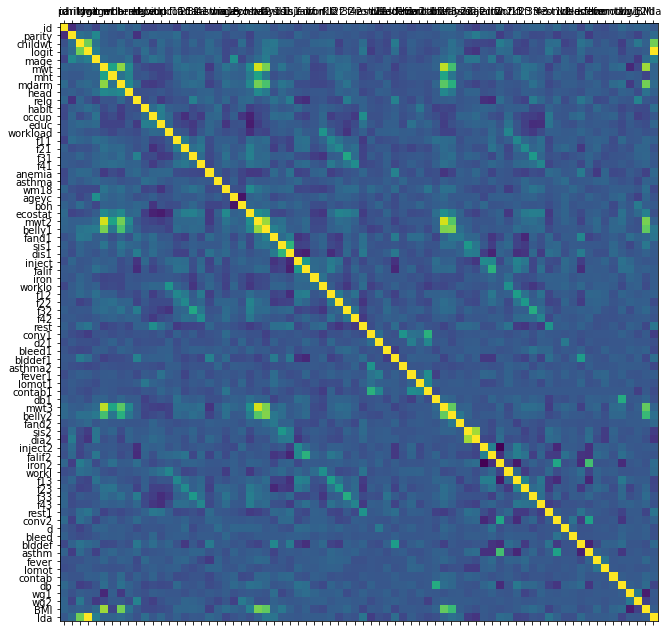

In [ ]:
# Now we check here are any correlation or not
def plot_def(total_data,size=11):
  corr = total_data.corr()
  fig, ax = plt.subplots(figsize=(size,size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)

plot_def(total_data)

In [ ]:
# Yes, here are some correlation in this dataset
# So, we remove correlated column

In [ ]:
# Delete lda column
del total_data["lda"]

In [ ]:
# Delete mwt2 column
del total_data["mwt2"]

In [ ]:
# Delete mwt3 column
del total_data["mwt3"]

In [ ]:
# Delete mwt column
del total_data["mwt"]

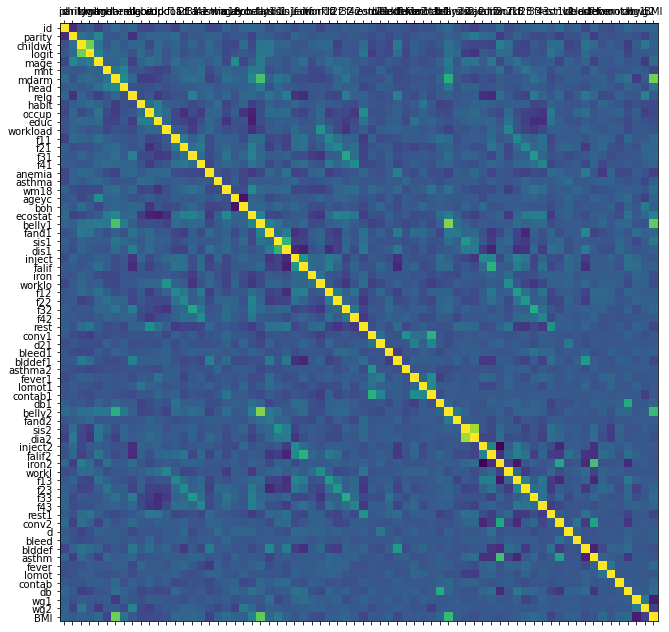

In [ ]:
# And we delete correlated column and then we see now here are any correlation

def plot_def(total_data,size=11):
  corr = total_data.corr()
  fig, ax = plt.subplots(figsize=(size,size))
  ax.matshow(corr)
  plt.xticks(range(len(corr.columns)), corr.columns)
  plt.yticks(range(len(corr.columns)), corr.columns)

plot_def(total_data)

In [ ]:
# So, here we see now no correlation in dataset

In [ ]:
total_data.head()

,id,parity,childwt,logit,mage,mht,mdarm,head,relg,habit,occup,educ,workload,f11,f21,f31,f41,anemia,asthma,wm18,ageyc,boh,ecostat,belly1,fand1,sis1,dis1,inject,falif,iron,worklo,f12,f22,f32,f42,rest,conv1,d21,bleed1,blddef1,asthma2,fever1,lomot1,contab1,db1,belly2,fand2,sis2,dia2,inject2,falif2,iron2,workl,f13,f23,f33,f43,rest1,conv2,d,bleed,blddef,asthm,fever,lomot,contab,db,wg1,wg2,BMI
0,101007,3,3.4,1,26.83,1.50,20.0,51.0,1,0,0,0,1,5,3.0,0.0,0.0,1,0,2.0,1.75,0.0,0,71.5,17.0,100.0,70.0,0.0,20.0,0.0,1.0,6.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,80.500000,25.400000,100.0000,80.000000,1.000000,30.000000,1.000000,1.000000,3.000000,2.00000,0.000000,0.000000,0.00000,0.000000,0.00,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.25,6.35,17.666667
1,101008,4,3.5,1,17.92,1.52,22.0,52.0,1,0,0,0,1,3,1.0,0.0,2.0,1,0,2.0,0.00,1.0,0,72.2,11.8,108.0,68.0,1.0,30.0,0.0,1.0,5.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,78.422259,20.533555,102.8203,61.570715,1.945946,51.019934,1.789037,0.887043,4.822259,4.33887,2.091362,2.895349,0.33719,0.019934,0.09,0.006645,0.65391,0.061667,0.023256,0.018425,0.003322,0.699499,-0.50,-45.00,19.477147
2,101009,1,3.0,1,35.00,1.50,20.0,53.0,0,1,1,1,1,7,5.0,0.0,4.0,1,0,2.0,4.00,1.0,1,79.5,19.0,98.0,60.0,2.0,50.0,1.0,1.0,6.0,5.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,81.500000,23.000000,90.0000,50.000000,2.000000,15.000000,1.000000,1.000000,7.000000,5.00000,0.000000,2.000000,1.00000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.00,4.50,19.111111
3,101010,1,3.0,1,26.00,1.48,21.0,51.5,1,0,1,0,1,2,3.0,7.0,4.0,0,0,1.0,8.00,0.0,2,71.5,12.0,100.0,50.0,2.0,13.0,1.0,1.0,7.0,4.0,7.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,78.000000,20.000000,102.0000,52.000000,2.000000,50.000000,1.000000,1.000000,7.000000,3.00000,7.000000,2.000000,1.00000,0.000000,0.00,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,4.00,7.00,18.261505
4,101013,1,3.0,1,25.00,1.51,28.0,49.5,1,0,1,0,1,7,5.0,2.0,7.0,0,0,1.0,5.00,0.0,1,83.0,12.0,106.0,42.0,2.0,20.0,0.0,1.0,7.0,4.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.500000,19.000000,98.0000,62.000000,2.000000,30.000000,1.000000,1.000000,7.000000,3.00000,1.000000,7.000000,0.00000,0.000000,0.00,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.50,3.50,24.560326


In [ ]:
total_data.shape

(666, 70)

In [ ]:
# We see all columns datatypes
total_data.dtypes

id           int64
parity       int64
childwt    float64
logit        int64
mage       float64
            ...   
contab     float64
db         float64
wg1        float64
wg2        float64
BMI        float64
Length: 70, dtype: object

In [ ]:
# Datasets All columns list
total_data.columns

Index(['id', 'parity', 'childwt', 'logit', 'mage', 'mht', 'mdarm', 'head',
       'relg', 'habit', 'occup', 'educ', 'workload', 'f11', 'f21', 'f31',
       'f41', 'anemia', 'asthma', 'wm18', 'ageyc', 'boh', 'ecostat', 'belly1',
       'fand1', 'sis1', 'dis1', 'inject', 'falif', 'iron', 'worklo', 'f12',
       'f22', 'f32', 'f42', 'rest', 'conv1', 'd21', 'bleed1', 'blddef1',
       'asthma2', 'fever1', 'lomot1', 'contab1', 'db1', 'belly2', 'fand2',
       'sis2', 'dia2', 'inject2', 'falif2', 'iron2', 'workl', 'f13', 'f23',
       'f33', 'f43', 'rest1', 'conv2', 'd', 'bleed', 'blddef', 'asthm',
       'fever', 'lomot', 'contab', 'db', 'wg1', 'wg2', 'BMI'],
      dtype='object')

In [ ]:
# Flittering out the unnecessary columns & store the new dataset which is total_data_sub
total_data_sub = total_data[[  'parity', 'childwt', 'logit', 'mage', 'mht', 'mdarm','workload',
                               'anemia', 'asthma', 'boh', 'inject', 'falif','iron', 'worklo', 'conv1',
                               'bleed1','asthma2','inject2', 'iron2', 'conv2', 'bleed','asthm','fever','BMI']]

In [ ]:
# After flittering out unnecessary columns then show first 5 rows
total_data_sub.head()

,parity,childwt,logit,mage,mht,mdarm,workload,anemia,asthma,boh,inject,falif,iron,worklo,conv1,bleed1,asthma2,inject2,iron2,conv2,bleed,asthm,fever,BMI
0,3,3.4,1,26.83,1.50,20.0,1,1,0,0.0,0.0,20.0,0.0,1.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,17.666667
1,4,3.5,1,17.92,1.52,22.0,1,1,0,1.0,1.0,30.0,0.0,1.0,0.0,0.0,0.0,1.945946,1.789037,0.019934,0.006645,0.061667,0.023256,19.477147
2,1,3.0,1,35.00,1.50,20.0,1,1,0,1.0,2.0,50.0,1.0,1.0,0.0,0.0,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,19.111111
3,1,3.0,1,26.00,1.48,21.0,1,0,0,0.0,2.0,13.0,1.0,1.0,0.0,0.0,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.261505
4,1,3.0,1,25.00,1.51,28.0,1,0,0,0.0,2.0,20.0,0.0,1.0,0.0,0.0,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,24.560326


In [ ]:
total_data_sub.shape

(666, 24)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe66f816450>,
      dtype=object)

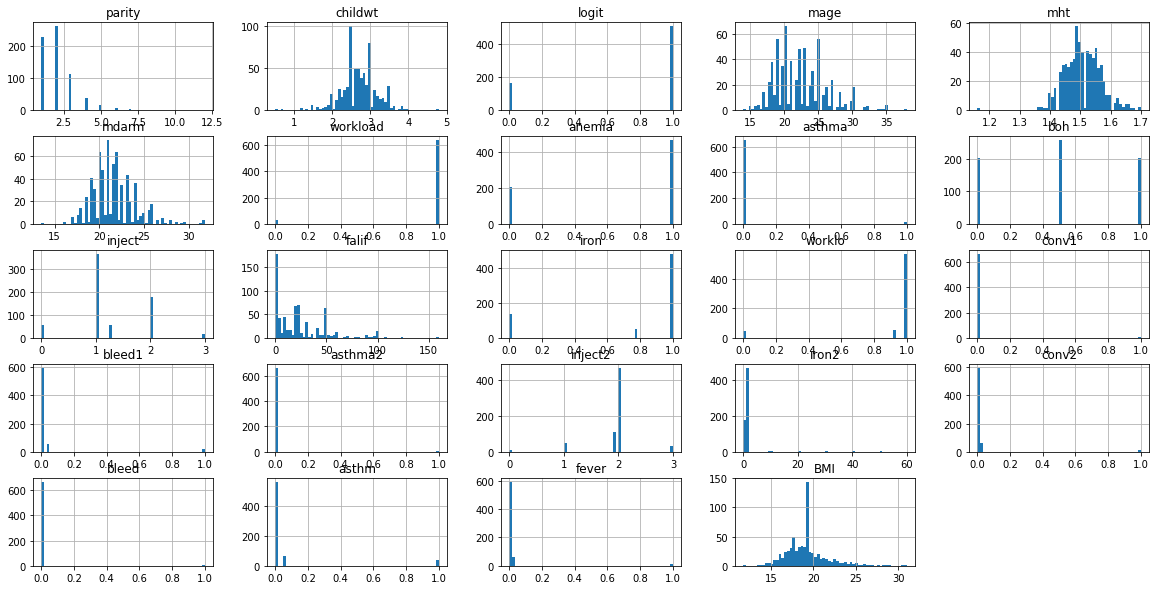

In [ ]:
# Checking Outliers
total_data_sub.hist(bins=60, figsize=(20,10))

In [ ]:
total_data_sub.dtypes

parity        int64
childwt     float64
logit         int64
mage        float64
mht         float64
mdarm       float64
workload      int64
anemia        int64
asthma        int64
boh         float64
inject      float64
falif       float64
iron        float64
worklo      float64
conv1       float64
bleed1      float64
asthma2     float64
inject2     float64
iron2       float64
conv2       float64
bleed       float64
asthm       float64
fever       float64
BMI         float64
dtype: object

In [ ]:
# Now building a Linear Regression model

In [ ]:
# Model-1

In [ ]:
# Here I splitting dependent & independent variable
x = total_data_sub[['BMI','fever','asthma','workload','parity','inject']]
y = total_data_sub[['logit']]

In [ ]:
# We import train_test_split from sckitlearn which is help to split data in train test  
from sklearn.model_selection import  train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
# show independent train data
x_train.head()

,BMI,fever,asthma,workload,parity,inject
235,18.718042,0.000000,0,1,3,2.0
556,19.171350,0.000000,0,1,2,2.0
426,19.171350,0.023256,0,1,3,1.0
132,19.066130,0.000000,0,1,1,1.0
173,16.824227,0.000000,0,1,2,1.0


In [ ]:
# show independent test data
x_test.head()

,BMI,fever,asthma,workload,parity,inject
578,15.614727,0.023256,0,1,2,1.253268
310,21.644121,0.000000,0,1,3,2.000000
14,17.120161,0.000000,0,1,3,1.000000
540,24.950302,0.000000,0,1,2,1.000000
76,20.775623,0.000000,0,1,1,2.000000


In [ ]:
# show dependent train data
y_train.head()

,logit
235,1
556,0
426,0
132,0
173,1


In [ ]:
# show dependent test data
y_test.head()

,logit
578,1
310,1
14,1
540,1
76,0


In [ ]:
# Now we import linear regression from sckitlearn to build a linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # create a linear regression object

In [ ]:
# now, fit the model into independent & dependent training dataset
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predict 
y_pred = lr.predict(x_test)

In [ ]:
y_test.head()

,logit
578,1
310,1
14,1
540,1
76,0


In [ ]:
y_pred[0:5]

array([[0.73188138],
       [0.80350758],
       [0.78639697],
       [0.78647313],
       [0.70857958]])

In [ ]:
# Now we find the error in this building model. 
# so, we import mean_squared_error from sckitlearn
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test,y_pred)

0.19265064376018678

In [ ]:
# Here we find 19% error. 
# so, here's accuracy is 81%

In [ ]:
# Model-2

In [ ]:
total_data_sub.dtypes

parity        int64
childwt     float64
logit         int64
mage        float64
mht         float64
mdarm       float64
workload      int64
anemia        int64
asthma        int64
boh         float64
inject      float64
falif       float64
iron        float64
worklo      float64
conv1       float64
bleed1      float64
asthma2     float64
inject2     float64
iron2       float64
conv2       float64
bleed       float64
asthm       float64
fever       float64
BMI         float64
dtype: object

In [ ]:
# Now we building a model-2

In [ ]:
x = total_data_sub[['BMI','fever','asthma','workload','parity','inject','anemia','iron','worklo','bleed','conv1','boh']]
y = total_data_sub[['logit']]

In [ ]:
from sklearn.model_selection import  train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [ ]:
x_train.head()

,BMI,fever,asthma,workload,parity,inject,anemia,iron,worklo,bleed,conv1,boh
235,18.718042,0.000000,0,1,3,2.0,1,0.0,1.0,0.000000,0.0,1.0
556,19.171350,0.000000,0,1,2,2.0,1,1.0,1.0,0.000000,0.0,0.0
426,19.171350,0.023256,0,1,3,1.0,0,1.0,1.0,0.006645,0.0,0.5
132,19.066130,0.000000,0,1,1,1.0,1,1.0,1.0,0.000000,0.0,0.5
173,16.824227,0.000000,0,1,2,1.0,1,1.0,1.0,0.000000,0.0,0.5


In [ ]:
x_test.head()

,BMI,fever,asthma,workload,parity,inject,anemia,iron,worklo,bleed,conv1,boh
578,15.614727,0.023256,0,1,2,1.253268,0,0.77814,0.919935,0.006645,0.006525,0.5
310,21.644121,0.000000,0,1,3,2.000000,1,1.00000,1.000000,0.000000,0.000000,1.0
14,17.120161,0.000000,0,1,3,1.000000,1,0.00000,1.000000,0.000000,0.000000,0.0
540,24.950302,0.000000,0,1,2,1.000000,1,1.00000,0.000000,0.000000,0.000000,1.0
76,20.775623,0.000000,0,1,1,2.000000,1,1.00000,1.000000,0.000000,0.000000,0.5


In [ ]:
y_train.head()

,logit
235,1
556,0
426,0
132,0
173,1


In [ ]:
y_test.head()

,logit
578,1
310,1
14,1
540,1
76,0


In [ ]:
from sklearn.linear_model import LinearRegression

lr_2 = LinearRegression()

In [ ]:
lr_2.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_2 = lr_2.predict(x_test)

In [ ]:
y_test.head()

,logit
578,1
310,1
14,1
540,1
76,0


In [ ]:
y_pred_2[0:5]

array([[0.64895782],
       [0.88034269],
       [0.76966733],
       [0.80818574],
       [0.7582518 ]])

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred_2)

0.19131663080740924

In [ ]:
# Here we also find same error 19%
# And same accuracy 81%

In [ ]:
print("Model-1 Mean Squared Error is: ")
print(mean_squared_error(y_test, y_pred))

print("\n")

print("Model-2 Mean Squared Error is: ")
print(mean_squared_error(y_test, y_pred_2))

print("\n")

print("So, Model-1 & Model-2 both model are same.")

Model-1 Mean Squared Error is: 
0.19265064376018678


Model-2 Mean Squared Error is: 
0.19131663080740924


So, Model-1 & Model-2 both model are same.


In [ ]:
# Now building a logistic regression model

In [ ]:
# Model-1

In [ ]:
# Here I splitting dependent & independent variable
x = total_data_sub.drop('logit', axis=1)
y = total_data_sub['logit']

In [ ]:
# We import train_test_split from sckitlearn which is help to split data in train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=21,stratify=y)

In [ ]:
# shape of dependent & independent training dataset
print(x_train.shape)
print(x_test.shape)

(466, 23)
(200, 23)


In [ ]:
# normalize the dependent & independent training dataset 
print(y_train.value_counts(normalize=True).round(2))
print(' ')
print(y_test.value_counts(normalize=True).round(2))

1    0.76
0    0.24
Name: logit, dtype: float64
 
1    0.76
0    0.24
Name: logit, dtype: float64


In [ ]:
# Here we import SMOTE. Because of
# SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem.
# It aims to balance class distribution by randomly increasing minority class examples by replicating them. 
# SMOTE synthesizes new minority instances between existing minority instances.

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=33, sampling_strategy= 0.75)
x_res, y_res = sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Now we import logistic regression from sckitlearn to build a logistic regression model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression() # create a logistic regression object

In [ ]:
# now, fit the model into independent & dependent training dataset
lr.fit(x_res,y_res)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# predict
y_pred = lr.predict(x_test)

In [ ]:
# Now we find the confusion in this building model. 
# so, we import confusion_matrix from sckitlearn

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 46,   3],
       [  7, 144]])

In [ ]:
(46+144)/(46+144+3+7)

0.95

In [ ]:
# So, we find 95% accuracy using logistic regression model.

In [ ]:
# So, in this dataset Logistic Regression is better perform
# than Linear regression.

# Linear Regression 81% accuracy when we perform in this dataset.
# Logistic Regression 95% accuracy when we perform in this dataset.